In [ ]:
#There are some non-float type in the file, especially in the last file (Winner)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time
import datetime
from datetime import datetime
import calendar
import os
from glob import glob
import ICLProjectFunctionsOVO2MD as f
import ICLProjectFunctionsOVO2MDBatch2 as f2
import ICLProjectFunctionsOVO2MDBatch3 as f3
import ICLProjectFunctions2 as f1

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#OVO2 BATCH1
PATH1 = '/Users/MatthiasDurand/Desktop/Imperial College/Master Thesis Project/Exported Data/OVO2 DATA'
RESULT_All1,RESULT_Concat1,NAMING1 = f.Exportation(PATH1)

In [ ]:
#OVO2 BATCH2
PATH2 = '/Users/MatthiasDurand/Desktop/Imperial College/Master Thesis Project/Exported Data/OVO2 DATA BATCH 2'
RESULT_All2,RESULT_Concat2,NAMING2 = f3.Exportation(PATH2)

In [ ]:
#OVO2 BATCH3
PATH3 = '/Users/MatthiasDurand/Desktop/Imperial College/Master Thesis Project/Exported Data/OVO2 DATA BATCH 3'
RESULT_All3,RESULT_Concat3,NAMING3 = f3.Exportation(PATH3)
#NAMING3 = NAMING3[1:len(NAMING3)] #For un unknown reason, a mistake value appeared in values NAMING3[0]

In [ ]:
nameOVO2 = []
dfOVO2 = []

for i in range (len(RESULT_Concat1)):
    if i not in [1,14,16,19,38,28,41]:
        nameOVO2.append(NAMING1[i])
        dfOVO2.append(RESULT_Concat1[i])
for i in range (len(RESULT_Concat2)):
    if i not in [11,16,17]:
        nameOVO2.append(NAMING2[i])
        dfOVO2.append(RESULT_Concat2[i])
for i in range (len(RESULT_Concat3)):
    if i not in [20,21,23,29,31,41]:
        nameOVO2.append(NAMING3[i])
        dfOVO2.append(RESULT_Concat3[i])

School1_Clinic0 = np.ones([len(nameOVO2)])
for i in range (len(nameOVO2)):
    if 'DISPENSARY' in nameOVO2[i] or 'DISP' in nameOVO2[i]:
        School1_Clinic0[i] = 0
BatterySmall1_Big0 = np.zeros([len(dfOVO2)])
CountSchool = 0
for i in range (len(dfOVO2)):
    if f.Daily_Profile(dfOVO2[i])['Battery Voltage'].min()<37.0:
        BatterySmall1_Big0[i] = 1
        CountSchool+=1
CountSchool

In [ ]:
#OVO1:
PATH01 = '/Users/MatthiasDurand/Desktop/Imperial College/Master Thesis Project/Exported Data/OVO1 PROJECT DATA V2'
RESULT_All01,RESULT_Concat01,NAMING01 = f1.Exportation(PATH01)
PATH02 = '/Users/MatthiasDurand/Desktop/Imperial College/Master Thesis Project/Exported Data/OVO1 PROJECT DATA/OVO1 PROJECT RMS DATA'
RESULT_All02,RESULT_Concat02,NAMING02 = f1.Exportation(PATH02)

In [ ]:
#OVO1
for i in range (len(NAMING01)):
    for j in range (len(NAMING02)):
        if (NAMING01[i]==NAMING02[j]):
            df = pd.concat([RESULT_Concat01[i],RESULT_Concat02[j]])
            RESULT_Concat01[i] = df.resample('1H').mean()
nameOVO1 = []
dfOVO1 = []
for i in range (len(RESULT_Concat01)):
    if i not in [2,8,10]:
        nameOVO1.append(NAMING01[i])
        dfOVO1.append(RESULT_Concat01[i])

### All data have been exported and cleaned

# 1. Potential Correlation between power consumption and schools' input criteria

## 1.1. Exportation of the Matrix, and cleaning of the input criteria

In [ ]:
Matrix2 = pd.read_csv('/Users/MatthiasDurand/Desktop/Imperial College/Master Thesis Project/Exported Data/OVO2 Schools.csv')

In [ ]:
Matrix1 = pd.read_csv('/Users/MatthiasDurand/Desktop/Imperial College/Master Thesis Project/Exported Data/TestJulySchoolsCSV.csv')

In [ ]:
#This code has to be run once only!
County = np.zeros([len(Matrix1)])
for i in range (len(Matrix1)):
    if (Matrix1['County'][i]==('Kilifi')): 
        County[i] = 1
    else:
        County[i] = 0
Matrix1['County'] = County

Grid = np.zeros([len(Matrix1)])
for i in range (len(Matrix1)):
    if (Matrix1['Grid'][i]=='no'): 
        Grid[i] = 1
    else:
        Grid[i] = 0
Matrix1['Grid'] = Grid

Source = np.zeros([len(Matrix1)])
for i in range (len(Matrix1)):
    if (Matrix1['Source of power'][i]=='solar_panels'): 
        Source[i] = 1
    if (Matrix1['Source of power'][i]=='grid solar_panels other'): 
        Source[i] = 2
    if (Matrix1['Source of power'][i]=='grid solar_panels'):
        Source[i] = 3
    if (Matrix1['Source of power'][i]=='diesel_generat'): 
        Source[i] = 4
Matrix1['Source of power'] = Source

In [318]:
Matrix1

,Name,County,Households,Grid,Grid Distance,Source of power,Attendency,Teachers,Non-teaching Staff,Teacher Age,Tot enrollment,Total day Stud,Total Board Stud
0,Dumuni Primary,1.0,300,1.0,4.0,0.0,97,7,2,27.0,144,144,0
1,Kakomani Primary,1.0,800,0.0,NaN,0.0,78,6,2,45.0,317,317,0
2,Migodomani Primary *,1.0,500,0.0,NaN,1.0,98,8,4,35.0,284,202,82
3,Mihingoni Primary,1.0,800,0.0,NaN,2.0,96,15,2,41.9,587,587,0
4,Mwamba Primary,1.0,400,0.0,NaN,2.0,80,8,3,38.0,167,138,29
5,Palakumi Primary,1.0,800,0.0,NaN,3.0,95,13,5,35.0,384,304,80
6,Shujaa Mekatilili Secondary,1.0,700,0.0,NaN,4.0,95,14,6,30.0,182,182,0
7,Winners EC Primary,1.0,400,0.0,NaN,0.0,92,7,2,33.0,143,143,0
8,Gambella Primary *,0.0,500,1.0,4.0,1.0,90,32,10,32.0,3219,3219,0
9,Horseed Primary,0.0,800,1.0,3.0,0.0,95,30,10,26.0,3038,3038,0


In [268]:
L = Matrix1['Name']
del Matrix1['Name']

In [269]:
Matrix1 = (Matrix1 - Matrix1.min())/(Matrix1.max()-Matrix1.min())

In [270]:
Matrix1['Name'] = L
Matrix1 = Matrix1.set_index(Matrix1['Name'])

In [271]:
#This program allows to add the power production/consumption for all the schools in the Matrix Table
Cons = np.zeros([len(Matrix1)])
Prod = np.zeros([len(Matrix1)])
for i in range (len(nameOVO1)):
    for j in range (len(Matrix1)):
        if (nameOVO1[i].split()[0] == Matrix1['Name'][j].split()[0].upper()):
            #print(Matrix['Name'][j], nameOVO1[i])
            Cons[j] = f.Daily_Mean_Power(dfOVO1[i])[0]
            Prod[j] = f.Daily_Mean_Power(dfOVO1[i])[1]
Matrix1['Power Consumption'] = Cons
Matrix1['Power Production'] = Prod
del Matrix1['Name']

In [272]:
Matrix1.corr()['Power Consumption']

County               -0.203881
Households           -0.066075
Grid                  0.264303
Grid Distance         0.008076
Source of power      -0.248045
Attendency            0.260722
Teachers              0.197771
Non-teaching Staff    0.002290
Teacher Age          -0.153132
Tot enrollment        0.278259
Total day Stud        0.293185
Total Board Stud     -0.324525
Power Consumption     1.000000
Power Production      0.845928
Name: Power Consumption, dtype: float64

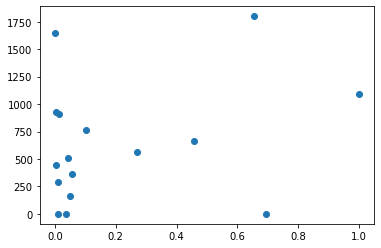

In [259]:
plt.plot(Matrix1['Tot enrollment'],Matrix1['Power Consumption'],'o')

### Exportation for OVO2 

In [ ]:
Matrix2 = Matrix2.rename(columns = {'Name of School' : 'Name'})
Matrix2 = Matrix2[0:264]

In [365]:
Cons = np.zeros([len(Matrix2)])
Prod = np.zeros([len(Matrix2)])
for i in range (len(nameOVO2)):
    for j in range (len(Matrix2)):
        if (nameOVO2[i].split()[0] == Matrix2['Name'][j].split()[0].upper()):
            #print(Matrix['Name'][j], nameOVO1[i])
            Cons[j] = f.Daily_Mean_Power(dfOVO2[i])[0]
            Prod[j] = f.Daily_Mean_Power(dfOVO2[i])[1]
Matrix2['Power Consumption'] = Cons
Matrix2['Power Production'] = Prod

In [366]:
n=0
L=[]
for i in range (len(nameOVO2)):
    for j in range (len(Matrix2)):
        if ((nameOVO2[i].split()[0] == Matrix2['Name'][j].split()[0].upper()) or (nameOVO2[i].split()[1] == Matrix2['Name'][j].split()[0].upper())) and School1_Clinic0[i]==1:#
 #           print(Matrix2['Name'][j], nameOVO2[i])
            L.append(i)
            n+=1
print(n)

85


In [ ]:
import math
Matrix22 = pd.DataFrame(data=Matrix2, columns = ['Name','County','Households','Is earby town national grid?','Grid distance',
                                                 'Source of electricity?','Source of power','Teachers','Non-teaching staff',
                                                 'Students (Female Day)','Students (Male Day)', 'Students (Female Boarding)',
                                                  'Students (Male Boarding)'])
Enrollment = []
Day = [] 
Board = []
for i in range (len(Matrix22)):
    if math.isnan(Matrix22['Students (Male Boarding)'][i]):
        Matrix22['Students (Male Boarding)'][i]=0
    if math.isnan(Matrix22['Students (Female Boarding)'][i]):
        Matrix22['Students (Female Boarding)'][i]=0
    if math.isnan(Matrix22['Students (Male Day)'][i]):
        Matrix22['Students (Male Day)'][i]=0
    if math.isnan(Matrix22['Students (Female Day)'][i]):
        Matrix22['Students (Female Day)'][i]=0
    if math.isnan(Matrix22['Households'][i]):
        Matrix22['Households'][i]=0
Matrix22['Tot enrollment'] = Matrix22['Students (Male Boarding)']+Matrix22['Students (Female Boarding)']+Matrix22['Students (Male Day)']+Matrix22['Students (Female Day)']
Matrix22['Total day Stud'] = Matrix22['Students (Male Day)']+Matrix22['Students (Female Day)']
Matrix22['Total Board Stud'] = Matrix22['Students (Male Boarding)']+Matrix22['Students (Female Boarding)']
Matrix22 = pd.DataFrame(data=Matrix22, columns = ['Name','County','Households','Is earby town national grid?','Grid distance',
                                                 'Source of electricity?','Source of power','Teachers','Non-teaching staff',
                                                 'Tot enrollment','Total day Stud', 'Total Board Stud'])
Matrix22.drop(['Source of electricity?'], axis = 1, inplace = True)
Matrix22 = Matrix22.rename(columns = {'Is earby town national grid?' : 'Grid','Grid distance':'Grid Distance','Non-teaching staff':'Non-teaching Staff'})

In [ ]:

Matrix = Matrix22
County = np.zeros([len(Matrix)])
for i in range (len(Matrix)):
    if (Matrix['County'][i]==('Kilifi')): 
        County[i] = 4
    if (Matrix['County'][i]==('Turkana')): 
        County[i] = 0
    if (Matrix['County'][i]==('Kwale')): 
        County[i] = 1
    if (Matrix['County'][i]==('Isiolo')): 
        County[i] = 2
    if (Matrix['County'][i]==('Taita Taveta')): 
        County[i] = 3
Matrix['County'] = County

Distance = np.zeros([len(Matrix)])
for i in range (len(Matrix)):
    if (Matrix['Grid Distance'][i]=='More than 10 km'): 
        Distance[i] = 10
    if (Matrix['Grid Distance'][i]==('Under 1km')): 
        Distance[i] = 1
    if (Matrix['Grid Distance'][i]==('1 - 5 km')): 
        Distance[i] = 3
    if (Matrix['Grid Distance'][i]==('5 - 10 km')): 
        Distance[i] = 7.5
Matrix['Grid Distance'] = Distance

Grid = np.zeros([len(Matrix)])
for i in range (len(Matrix)):
    if (Matrix['Grid'][i]=='Yes'): 
        Grid[i] = 1
    else:
        Grid[i] = 0
Matrix['Grid'] = Grid

Source = np.zeros([len(Matrix)])
for i in range (len(Matrix)):
    if (Matrix['Source of power'][i]=='PV System'): 
        Source[i] = 1
    if (Matrix['Source of power'][i]=='None'): 
        Source[i] = 0
    if (Matrix['Source of power'][i]=='National Grid') or Matrix['Source of power'][i]=='National grid': 
        Source[i] = 2
    if (Matrix['Source of power'][i]=='None'):
        Source[i] = 3
    if (Matrix['Source of power'][i]=='Other 1'): 
        Source[i] = 4
Matrix['Source of power'] = Source

# Creation of a new matrix, which will be a concatenation of the OVO1 and OVO2 matrix! 


In [ ]:
del Matrix1['Attendency']
del Matrix1['Teacher Age']
print(Matrix1.columns)
print(Matrix.columns)

In [ ]:
FinalMatrix=pd.concat([Matrix1,Matrix])
FinalMatrix

# Now, this matrix has to be standardised, and the cons/prod data are added

In [ ]:
L = FinalMatrix['Name']
del FinalMatrix['Name']
FinalMatrix = (FinalMatrix - FinalMatrix.min())/(FinalMatrix.max()-FinalMatrix.min())
FinalMatrix['Name'] = L
FinalMatrix = FinalMatrix.set_index(FinalMatrix['Name'])

In [ ]:
Cons = np.zeros([len(FinalMatrix)])
Prod = np.zeros([len(FinalMatrix)])
for i in range (len(nameOVO2)):
    for j in range (len(FinalMatrix)):
        if ((nameOVO2[i].split()[0] == FinalMatrix['Name'][j].split()[0].upper()) or (nameOVO2[i].split()[1] == FinalMatrix['Name'][j].split()[0].upper())) and School1_Clinic0[i]==1:
            Cons[j] = f.Daily_Mean_Power(dfOVO2[i])[0]
            Prod[j] = f.Daily_Mean_Power(dfOVO2[i])[1]
for i in range (len(nameOVO1)):
    for j in range (len(FinalMatrix)):
        if ((nameOVO1[i].split()[0] == FinalMatrix['Name'][j].split()[0].upper())):
            Cons[j] = f.Daily_Mean_Power(dfOVO1[i])[0]
            Prod[j] = f.Daily_Mean_Power(dfOVO1[i])[1]
FinalMatrix['Power Consumption'] = Cons
FinalMatrix['Power Production'] = Prod
del FinalMatrix['Name']

In [ ]:
#Drop all the raws with no values for power:
#Matrix.drop(['Migodomani Primary *','Gambella Primary *','Kalokor Primary'], inplace=True)
ToDel=[]
for i in range (len(FinalMatrix)):
    if FinalMatrix['Power Consumption'][i]==0:
        ToDel.append(FinalMatrix.index[i])
FinalMatrix.drop(ToDel, inplace=True)

In [ ]:
FinalMatrix.corr()['Power Consumption']

In [455]:
L = np.zeros([len(FinalMatrix)], dtype=float)
for i in range (len(FinalMatrix)):
    if FinalMatrix['Power Consumption'][i]==0:
        L[i]=0
    if FinalMatrix['Power Consumption'][i]!=0:
        L[i] = FinalMatrix['Power Consumption'][i]

X = np.zeros([len(FinalMatrix), len(FinalMatrix.columns)-2], dtype=float)
for i in range (len(FinalMatrix)):
    c=FinalMatrix.columns
    for j in range (len(c)-2):
        X[i,j] = (FinalMatrix[c[j]][i])
for i in range (len(FinalMatrix)):
    if (math.isnan(X[i][3])):
        X[i][3] = 0

In [405]:
from numpy import *
def poly_exp(X, degree):
    N,D = X.shape
    for d in range(2,degree+1):
        X = column_stack([X,X[:,0:D]**d])
    return X
def computeCost(X, y, theta):
    m = y.size  # number of training examples
    J = (1/(2*m))*sum((np.dot(X,theta)-y)**2)
    # ===========================================================
    return J
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]  # number of training examples
    n=len(theta)

    theta = theta.copy()
    J_history = [] # Use a python list to save cost in every iteration
    J_history.append(computeCost(X, y, theta))
    for i in range(num_iters):
        theta = theta - alpha*(1/m)*np.dot(np.dot(X,theta)-y,X)
        J_history.append(computeCost(X, y, theta))
    return theta, J_history

In [416]:
degree = 5
x = poly_exp(X, degree)
x.shape

(97, 50)

In [418]:
# initialize fitting parameters
theta = np.zeros(50)

# some gradient descent settings
iterations = 50000
alpha = 0.2

theta, J_history = gradientDescent(x ,L, theta, alpha, iterations)

In [419]:
J_history[15000]

147439.39314398522

In [420]:
E = 0
for i in range (len(x)):
    E+= (max(np.dot(x[i],theta),L[i]) - min(np.dot(x[i],theta),L[i]))/L[i]
    print(np.dot(x[i],theta),'and the correct answer is',L[i])

667.895026871873 and the correct answer is 447.061650345457
831.6479135176107 and the correct answer is 511.40455293929006
1133.797312643248 and the correct answer is 763.5995770417792
794.9895484118088 and the correct answer is 291.8359916389508
744.1986998662942 and the correct answer is 365.14982339203686
802.8661062345693 and the correct answer is 912.0741618179965
437.4811788293305 and the correct answer is 926.4217884288609
1618.1649285142598 and the correct answer is 1799.3671262599698
1647.512391070429 and the correct answer is 1648.2876633725682
1113.060285822239 and the correct answer is 1094.202875708927
181.25876760505525 and the correct answer is 167.52785541793202
948.168051958408 and the correct answer is 668.1104445841821
568.596409759603 and the correct answer is 559.9611709323152
1356.3270037020516 and the correct answer is 1364.7887445280908
1169.2706297992543 and the correct answer is 1636.734966146231
1215.6315808263696 and the correct answer is 1007.5628496568492


# Now, I have a complete matrix with all the data available; I have to try different algorithms

# MultiClass Classification:

In [421]:
def sigmoid(z):
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1/(1+math.exp(1)**(-z))
    return g

In [422]:
def lrCostFunction(theta, X, y, lambda_):
    m = X.shape[0]  
    if y.dtype == bool:
        y = y.astype(int)
    grad = np.zeros(theta.shape)
    n=len(grad)
    T=theta*theta
    J = (1/m)*sum(-y*np.log(sigmoid(np.dot(X,np.transpose(theta)))) - (1-y)*np.log(1-sigmoid(np.dot(X,np.transpose(theta))))) + lambda_*(1/(2*m))*(sum(theta*theta)-T[0])
    grad = (1/m)*(np.dot(sigmoid(np.dot(X,np.transpose(theta)))-y,X)) + lambda_*(1/m)*theta
    grad[0]=grad[0]-lambda_*(1/m)*theta[0]
    return J, grad

In [423]:
def oneVsAll(X, y, num_labels, lambda_):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    initial_theta = np.zeros(X.shape[1])
    options = {'maxiter': 50}
    # ====================== YOUR CODE HERE ======================
    for i in range (num_labels):
        yy=(y==i)
        res = optimize.minimize(lrCostFunction,initial_theta,(X, yy, lambda_),jac=True,method='TNC',options=options)
        all_theta[i] = res.x
    return all_theta

In [440]:
def predictOneVsAll(all_theta, X):
    m,K = X.shape;
    num_labels = all_theta.shape[0]
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.zeros(m)
    Mult = np.dot(X,np.transpose(all_theta))
    p=np.argmax(Mult, axis=1)
    return p

In [502]:
def LogicalTransformation(L):
    l=np.zeros(len(L))
    for i in range (len(L)):
        for j in range (34):
            if L[i]<100*(j+1) and L[i]>100*j:
                l[i] = j
    return(l)
l=LogicalTransformation(L)

In [495]:
def LogicalTransformation(L):
    l=np.zeros(len(L))
    for i in range (len(L)):
        for j in range (17):
            if L[i]<100*3*(j+1) and L[i]>100*3*j:
                l[i] = j
    return(l)
l=LogicalTransformation(L)

In [503]:
l.max()

33.0

In [504]:
X=X
y=l
num_labels = 34
lambda_ = 0.1
all_theta = oneVsAll(X, y, num_labels, lambda_)

In [505]:
pred = predictOneVsAll(all_theta, X)
print('Training Set Accuracy: {:.2f}%'.format(np.mean(pred == y) * 100))

Training Set Accuracy: 30.93%


In [489]:
pred

array([1, 1, 2, 1, 1, 2, 1, 5, 5, 3, 0, 3, 5, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [490]:
y

array([ 1.,  1.,  2.,  0.,  1.,  3.,  3.,  5.,  5.,  3.,  0.,  2.,  1.,
        4.,  5.,  3.,  5.,  3.,  3.,  2.,  4.,  2.,  6.,  4.,  4.,  2.,
        1.,  2.,  5.,  2.,  1.,  3.,  2.,  2., 11.,  2., 10.,  5.,  2.,
        2.,  6.,  1.,  4.,  1.,  2.,  3.,  7.,  2.,  2.,  1.,  1.,  1.,
        1.,  4.,  1.,  2.,  1.,  9.,  8.,  2.,  2.,  3.,  2.,  1.,  2.,
        1.,  1.,  1.,  6.,  4.,  1.,  0.,  7.,  1.,  3.,  2.,  6.,  2.,
        3.,  5.,  1.,  1.,  2.,  2.,  1.,  4.,  3.,  4.,  1.,  1.,  1.,
        0.,  1.,  1.,  0.,  4.,  1.])

# Neural Network:

In [508]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
y_train = l
x_train = X
# YOUR CODE SHOULD END HERE
model = tf.keras.models.Sequential([
    # YOUR CODE SHOULD START HERE
keras.layers.Dense(units=1, input_shape=[10]),tf.keras.layers.Dense(40, activation=tf.nn.relu), tf.keras.layers.Dense(40, activation=tf.nn.relu), tf.keras.layers.Dense(1, activation=tf.nn.relu)
    # YOUR CODE SHOULD END HERE tf.keras.layerstf.keras.layers.Dense(6, activation=tf.nn.relu),
])
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
# model fitting
history = model.fit(x_train, y_train, epochs=200)

Epoch 1/200


In [1]:
L2 = np.array([[1,2,3,4,5,6,7,8,9,10]])
model.predict(L2)

NameError: name 'np' is not defined

In [529]:
X[0]
model.predict([[X[0]]])

array([[9.246783]], dtype=float32)

In [536]:
for i in range (len(l)):
    print(model.predict([[X[i]]]),'Should be',l[i])

[[8.621776]] Should be 4.0
[[6.958132]] Should be 5.0
[[8.319171]] Should be 7.0
[[7.2959123]] Should be 2.0
[[8.367638]] Should be 3.0
[[8.983566]] Should be 9.0
[[6.5593705]] Should be 9.0
[[12.14551]] Should be 17.0
[[9.479635]] Should be 16.0
[[12.632785]] Should be 10.0
[[8.03523]] Should be 1.0
[[8.748185]] Should be 6.0
[[13.545927]] Should be 5.0
[[10.943884]] Should be 13.0
[[11.211451]] Should be 16.0
[[10.210475]] Should be 10.0
[[5.171664]] Should be 15.0
[[5.810707]] Should be 11.0
[[6.27851]] Should be 9.0
[[11.131813]] Should be 7.0
[[11.957762]] Should be 13.0
[[9.1583395]] Should be 7.0
[[11.4138775]] Should be 18.0
[[9.855076]] Should be 14.0
[[9.462757]] Should be 14.0
[[11.311897]] Should be 6.0
[[9.656807]] Should be 5.0
[[8.787908]] Should be 6.0
[[9.256941]] Should be 15.0
[[11.2604265]] Should be 8.0
[[11.477693]] Should be 5.0
[[8.950047]] Should be 9.0
[[9.33216]] Should be 8.0
[[9.637236]] Should be 8.0
[[10.803618]] Should be 33.0
[[9.887526]] Should be 7.0
